# Práctica 2: Reducción de Dimensionalidad

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mutual_info_score # categorical variables
from sklearn.feature_selection import mutual_info_regression # target variable should be continuous (regression)
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
dataset = load_breast_cancer()
descripcion = dataset["DESCR"]
target_names = dataset["target_names"]
X = pd.DataFrame(dataset["data"], columns=dataset["feature_names"])
y = pd.Series(dataset["target"]).replace({0:target_names[0], 1:target_names[1]})

In [3]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y.value_counts()

benign       357
malignant    212
dtype: int64

In [5]:
print(descripcion)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Guión de la práctica

1. El dataset está formado por un conjunto de pacientes con un tumor a los que se les ha realizado una prueba médica. Los datos de esa prueba están recogidos en "X" (una fila, un paciente). Por otra parte, en "y" está recogida la información que se desea predecir (si el tumor es maligno o benigno). Lee bien la descripción del dataset contenida en la celda anterior.

2. Usando técnicas de filtrado, haz un ranking de las variables contenidas en X, de más informativa a menos informativa. Haz dos rankings: usando correlación, y usando información mutua. ¿El orden en estos rankings te parece razonable? ¿las variables más informativas son las que tienen histogramas condicionados a la clase más separados? ¿Coinciden los dos rankings? ¿por qué?

3. Realiza un análisis PCA del dataset:
    - Preprocesado de las variables X
    - Cálculo de las nuevas variables PCA
    - Scatter plot interactivo del dataset en las dos primeras componentes principales, donde cada punto tiene un color correspondiente a la clase, y en el que al pasar con el ratón encima de un punto se muestre el valor de las variables **originales**. ¿Qué puedes decir del dataset? ¿es un problema fácil de predecir?
    - Scatter plot en el que se visualice el dataset junto a las proyecciones de las variables originales (una variable original, una flecha). ¿Qué puedes decir de las variables? ¿hay grupos diferenciados de variables? ¿los resultados son compatibles con los resultados de un clustermap de las variables?

Para realizar estos ejercicios adapta el código que hemos visto en clase.

## Entrega de la práctica

- La práctica se realizará individualmente
- Se entregará únicamente este notebook extendido con el código y comentarios necesarios.

---

Primero, podemos observar las propiedades de las columnas, como la media, el mínimo, el máximo y la desviación estándar, utilizando la función describe(). El código describe() proporciona estadísticas resumidas de las columnas numéricas del DataFrame.

Luego, al observar las correlaciones entre las columnas, podemos comprender mejor las relaciones que existen entre ellas.

In [6]:
# Show the describe of the data
X.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
# Show the describe of the target
y.describe()

count        569
unique         2
top       benign
freq         357
dtype: object

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


Obtenemos un resumen de un DataFrame y una Serie con información sobre la estructura, los tipos de datos y los valores que faltan en el DataFrame con **info()**. Además, nos muestra índice, nombres de columnas, uso de memoria, recuento de no nulos de DataFrame. Observamos que no hay valores perdidos.

# Pregunta

### 2. Usando técnicas de filtrado, haz un ranking de las variables contenidas en X, de más informativa a menos informativa. Haz dos rankings: usando correlación, y usando información mutua. ¿El orden en estos rankings te parece razonable? ¿las variables más informativas son las que tienen histogramas condicionados a la clase más separados? ¿Coinciden los dos rankings? ¿por qué?

#### Ranking de variables de más informativa a menos informativa usando Correlación

Utilizamos factorize() para convertir variables categóricas (con valores de cadena u otros valores no numéricos) en representaciones numéricas. (lo usaremos más tarde)

Dado que nuestra variable target es categórica, la correlación de Pearson no es adecuada para este caso.

**La correlación de Spearman, por otro lado, es adecuada tanto para variables continuas como categóricas. Por lo tanto, podemos utilizarla para medir la relación entre las variables.**

Adicionalmente, podemos utilizar la correlación de Pearson con la variable numérica después de convertirla a una variable categórica mediante la función factorize().

Luego, podemos realizar un ranking de las variables.

In [10]:
# Apply factorize() to the target variable to convert it to a numerical variable
y_numerical, target_categories = pd.factorize(y)

# Convert the numerical format of the target variable into a pandas Series
y_numerical = pd.Series(y_numerical)
print(y_numerical)
print()
print(target_categories)
print()


# Pearson correlation: the correlation between two continuous variables

# Use correlation to rank the features from the most informative to the least informative
# Use correlation of filtering tecniques
correlation = X.corrwith(y_numerical)
# correlation = X.apply(lambda x: x.corr(y_numerical))
Column_names = X.columns

# Rank the features from the most informative to the least informative
correlation_sorted = correlation.abs().sort_values(ascending=False)
# Convert correlation_sorted to a DataFrame with the column names "Column names and "Correlation"
# correlation_sorted = pd.DataFrame({"Column names": correlation_sorted.index, "Correlation": correlation_sorted.values})

print("Ranking by using correlation: \n")
print(correlation_sorted)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int64

Index(['malignant', 'benign'], dtype='object')

Ranking by using correlation: 

worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
wo

**En el futuro, utilizaremos la Spearman's rank correlation para analizar la relación entre las variables.**

In [11]:
# Spearman's rank correlation: the correlation between a numerical and a categorical variable

# Calculate Spearman's rank correlation with the target variable
spearman_corr = X.corrwith(y, method='spearman')

# Sort features by absolute correlation values in descending order
sorted_corr = spearman_corr.abs().sort_values(ascending=False)

# Print the ranked features
print("Features ranked by Spearman's correlation with the target:\n")
print(sorted_corr)

Features ranked by Spearman's correlation with the target:

worst perimeter            0.796319
worst radius               0.787933
worst area                 0.786902
worst concave points       0.781674
mean concave points        0.777877
mean perimeter             0.748496
mean area                  0.734122
mean concavity             0.733308
mean radius                0.732785
area error                 0.714184
worst concavity            0.705734
perimeter error            0.630411
radius error               0.616912
mean compactness           0.609288
worst compactness          0.606810
concave points error       0.488717
worst texture              0.476720
concavity error            0.470338
mean texture               0.461971
worst smoothness           0.425513
worst symmetry             0.396843
compactness error          0.380666
mean smoothness            0.371892
mean symmetry              0.332567
worst fractal dimension    0.311477
fractal dimension error    0.201492
symm

/home/merve/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


#### Ranking de variables de más informativa a menos informativa usando Información Mutua

El método mutual_info_classif se utiliza para clasificar características en relación con una variable objetivo categórica basándose en la información mutua.

**Primer código:** Calcula todos los valores de información mutua en un solo paso utilizando mutual_info_classif(X, y). Esto suele ser más eficiente para conjuntos de datos más grandes.

**Segundo código:** Recorre cada columna de X individualmente y calcula la información mutua con mutual_info_classif(X[[col]], y)[0]. Esto puede ser menos eficiente, pero puede ser útil para la depuración o la comprensión de las relaciones de características individuales.

Al observar los resultados de ambos códigos, veremos que los valores calculados son muy similares.

In [12]:
# First code:

# Use mutual information to rank the features from the most informative to the least informative
# Use mutual information of filtering tecniques
mutual_info = mutual_info_classif(X, y)

# Rank the features from the most informative to the least informative
mutual_info = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)
print("First Ranking by using mutual information: \n")
print(mutual_info)

# Second code:

# Define columns
columns = X.columns

mutual_info2 = []
for col in columns:
    # Calculate the mutual information of each feature with the target variable
    mi = mutual_info_classif(X[[col]], y)
    # Append the mutual information to the list
    mutual_info2.append(mi[0])

# Create a Series with the mutual information values and the column names as the index
mutual_info2 = pd.Series(mutual_info2, index=columns).sort_values(ascending=False)
print("Second Ranking by using mutual information: \n")
print(mutual_info2)

First Ranking by using mutual information: 

worst perimeter            0.473482
worst area                 0.464313
worst radius               0.454150
mean concave points        0.443114
worst concave points       0.439375
mean perimeter             0.404569
mean concavity             0.375515
mean radius                0.365361
mean area                  0.362101
area error                 0.340986
worst concavity            0.315391
perimeter error            0.275082
radius error               0.249813
worst compactness          0.225337
mean compactness           0.214943
concave points error       0.124750
worst texture              0.123517
concavity error            0.116620
worst smoothness           0.099663
worst symmetry             0.097748
mean texture               0.095433
mean smoothness            0.083840
compactness error          0.074371
mean symmetry              0.070282
worst fractal dimension    0.069648
fractal dimension error    0.040696
smoothness error   

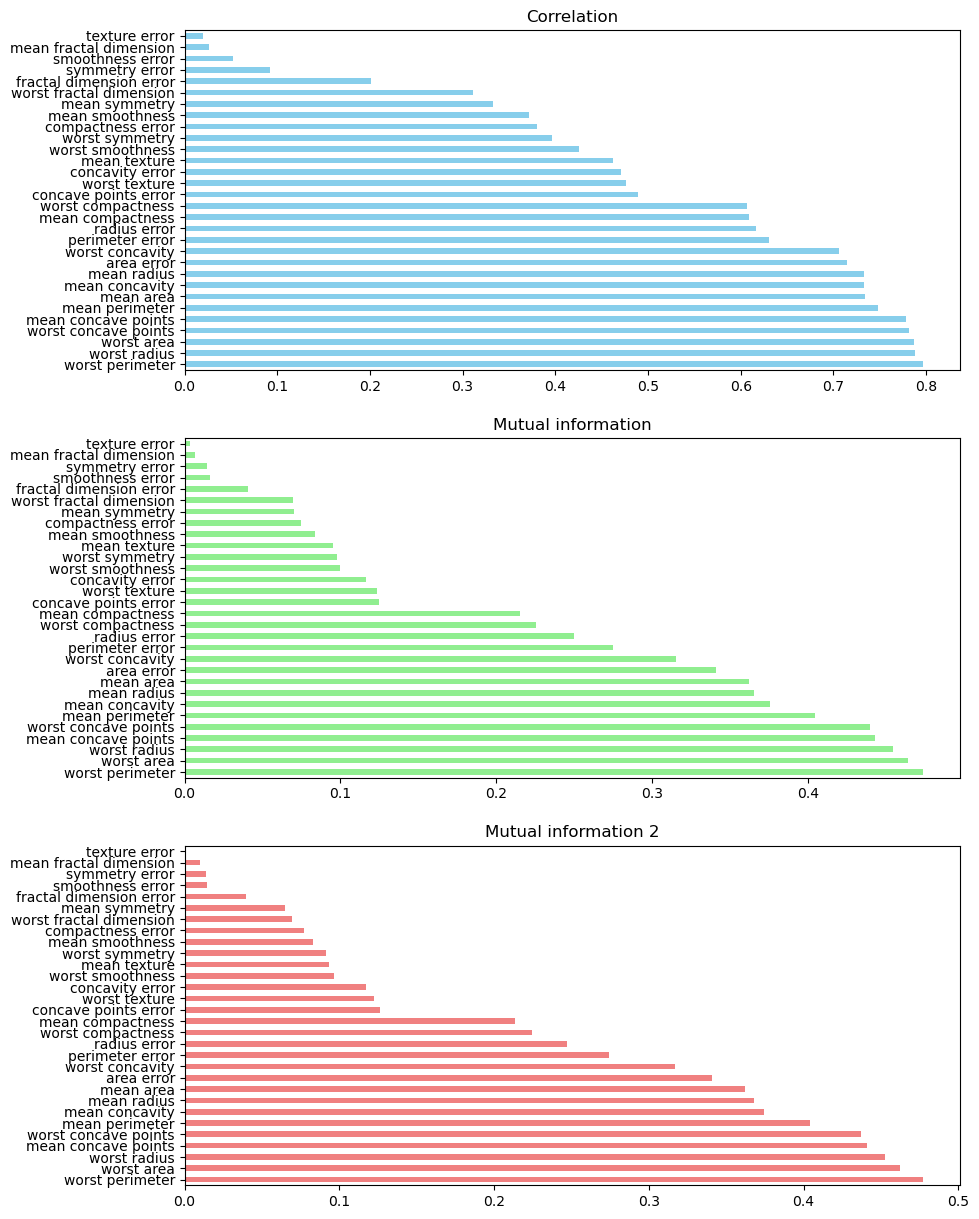

In [13]:
# Separate charts for each ranking
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot the correlation ranking horizontally
sorted_corr.plot(kind='barh', ax=axes[0], title='Correlation', color='skyblue')

# Plot the mutual information ranking
mutual_info.plot(kind='barh', ax=axes[1], title='Mutual information', color='lightgreen')

# Plot the mutual information ranking for the second code
mutual_info2.plot(kind='barh', ax=axes[2], title='Mutual information 2', color='lightcoral')

# Show the plot
plt.show()

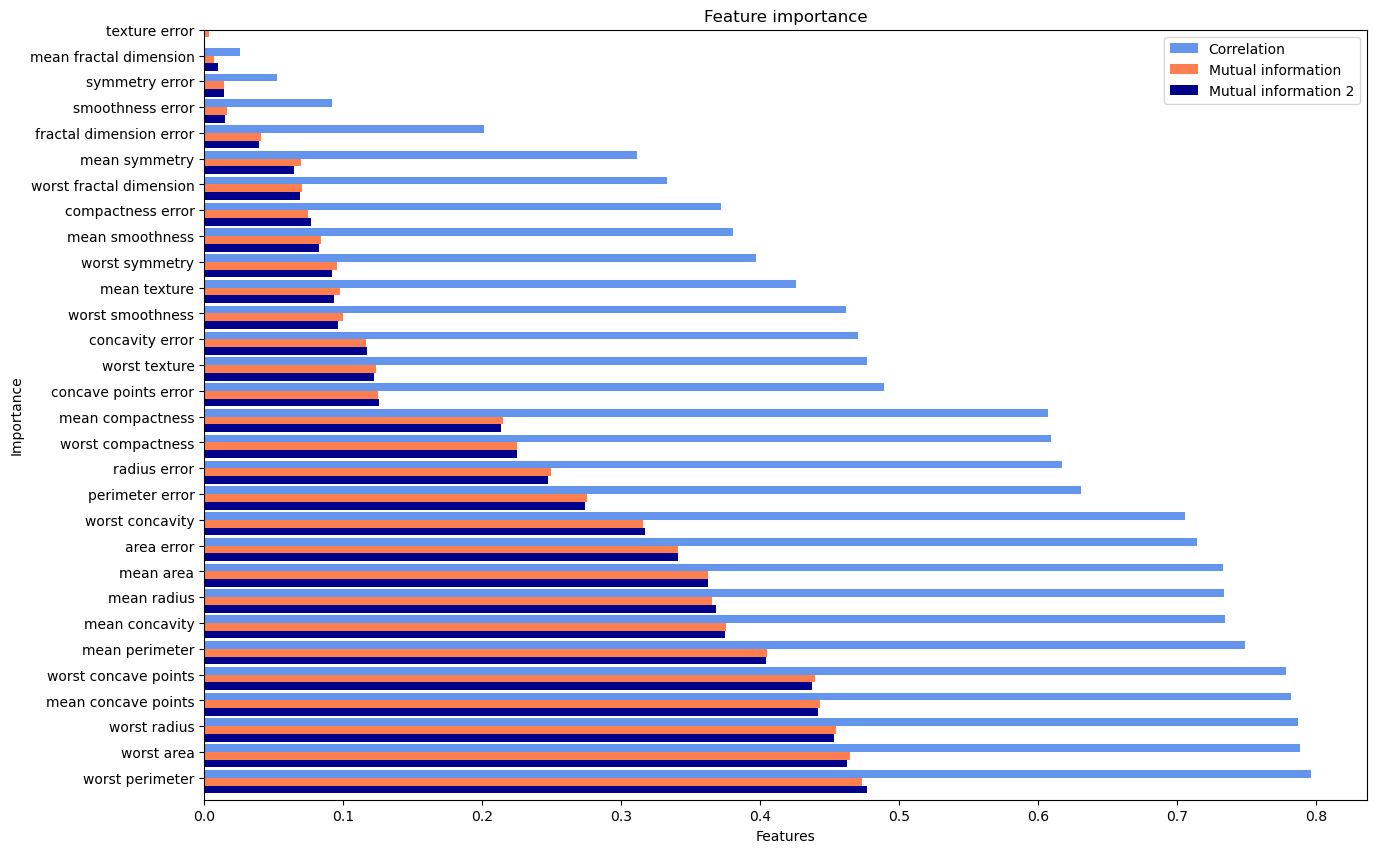

In [14]:
# Plot the stacked bar chart of the mutual information and correlation rankings
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the correlation ranking
sorted_corr.plot(kind='barh', color='cornflowerblue', ax=ax, position=0, width=0.3)

# Plot the mutual information ranking
mutual_info.plot(kind='barh', color='coral', ax=ax, position=1, width=0.3)

# Plot the mutual information ranking for the second code
mutual_info2.plot(kind='barh', color='darkblue', ax=ax, position=2, width=0.3)

# Set the title and labels
ax.set_title('Feature importance')
ax.set_xlabel('Features')
ax.set_ylabel('Importance')

# Set the legend
ax.legend(['Correlation', 'Mutual information', 'Mutual information 2'])

# Show the plot
plt.show()

Al observar los resultados de ambos códigos, podemos apreciar que los valores calculados de mutual_info y mutual_info2 son muy similares para todas las columnas.

Además, las columnas worst perimeter, worst area, worst radius, mean concave points, worst concave points, mean perimeter, mean concavity, mean radius, mean area, area error y worst concavity presentan correlaciones (casi 0.8) muy altas.

Para visualizar las clasificaciones realizadas, podemos recurrir a un gráfico de barras.

Este tipo de visualización nos permite observar de forma clara y concisa la relación entre la correlación y la información mutua de las diferentes columnas.

Además, podemos crear múltiples gráficos de barras para analizar con mayor detalle las relaciones específicas entre las variables de interés.

---

**Veremos Histogramas Condicionados de Correlaciones**

Cada fila representa una característica medida a partir de la mamografía y cada columna muestra la distribución de esa característica para masas benignas y malignas.

Top-ranked feature based on correlations: ('worst perimeter', 'worst radius', 'worst area', 'worst concave points', 'mean concave points', 'mean perimeter', 'mean area', 'mean concavity', 'mean radius', 'area error')


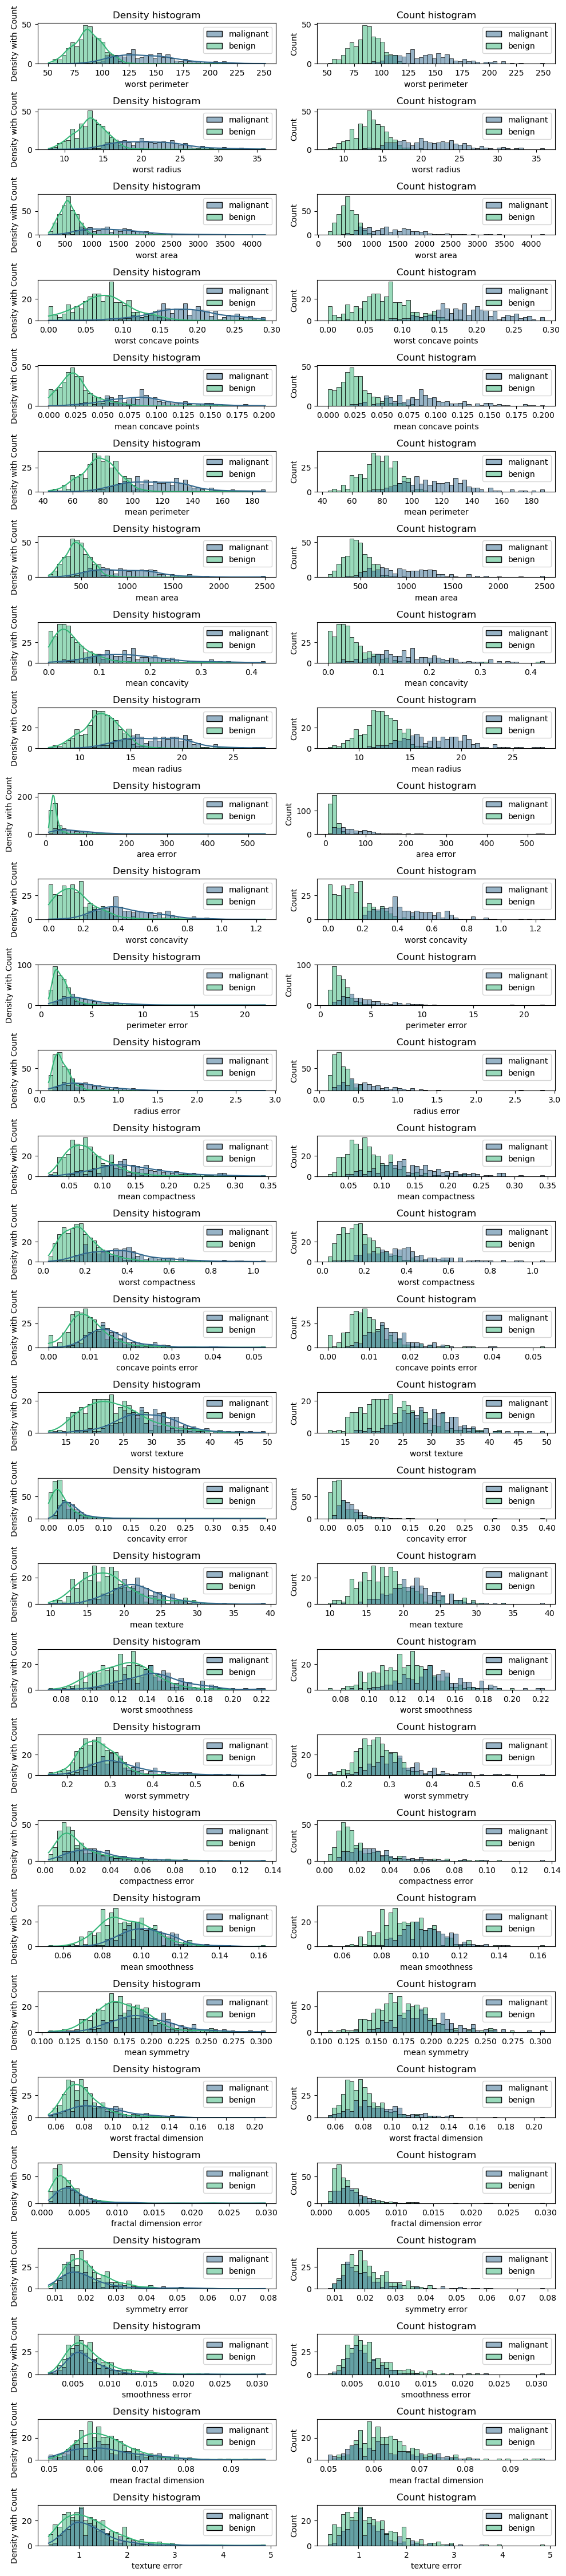

In [15]:
# See the top-ranked feature based on correlation
top_feature_corr0 = sorted_corr.index[0]
top_feature_corr1 = sorted_corr.index[1]
top_feature_corr2 = sorted_corr.index[2]
top_feature_corr3 = sorted_corr.index[3]
top_feature_corr4 = sorted_corr.index[4]
top_feature_corr5 = sorted_corr.index[5]
top_feature_corr6 = sorted_corr.index[6]
top_feature_corr7 = sorted_corr.index[7]
top_feature_corr8 = sorted_corr.index[8]
top_feature_corr9 = sorted_corr.index[9]


# Print the top-ranked feature based on correlation
print(f'Top-ranked feature based on correlations: {top_feature_corr0 , top_feature_corr1 , top_feature_corr2 , top_feature_corr3 , top_feature_corr4 , top_feature_corr5 , top_feature_corr6 , top_feature_corr7 , top_feature_corr8 , top_feature_corr9}')

# Condition on the target variable
# Use a distinct color palette
# Add density curves for smoother visualization with kde=True
# Create a conditional histogram for the top-ranked feature based on correlation
# Plot subpolot separate histograms for density and count
fig, axes = plt.subplots(30, 2, figsize=(10, 45))

# Plot density histogram for the top-ranked feature based on correlation the first 6 features
for i in range(30):
    sns.histplot(data=X, x=sorted_corr.index[i], hue=y, palette='viridis', kde=True, bins=50, ax=axes[i, 0])
    # Set title and labels for density histogram
    axes[i, 0].set_title('Density histogram')
    axes[i, 0].set_xlabel(sorted_corr.index[i])
    axes[i, 0].set_ylabel('Density with Count')

    # Plot count histogram
    sns.histplot(data=X, x=sorted_corr.index[i], hue=y, palette='viridis', kde=False, bins=50, ax=axes[i, 1])
    # Set title and labels for count histogram
    axes[i, 1].set_title('Count histogram')
    axes[i, 1].set_xlabel(sorted_corr.index[i])
    axes[i, 1].set_ylabel('Count')

    # Layout the subplots
    plt.tight_layout()
    
    
# Show the plot
plt.show()

En general, los histogramas condicionales sugieren que las algunas características podrían ser útiles para discriminar entre masas benignas y malignas:

Worst perimeter: Las masas benignas tienden a tener un perimeter menor que las malignas.

Worst radius: Las masas benignas tienden a tener un radius menor que las malignas.

Worst area: Las masas benignas tienden a tener un área menor que las malignas.

Worst concave points: Las masas benignas tienden a tener puntos cóncavos más pequeños que las malignas.

Mean concave points: Las masas benignas tienden a tener una media de puntos cóncavos menor que las malignas.

Mean perimeter: Las masas benignas tienden a tener una media de perimeter menor que las malignas.

Mean area: Las masas benignas tienden a tener un área media menor que las malignas.

Mean concavity: Las masas malignas tienden a tener valores de concavidad más altos que las benignas.

Area error: Las masas benignas tienden a tener un error de área menor que las malignas.

Worst concavity: Las masas benignas tienden a tener una concavidad menor que las malignas.

Características con menor potencial para discriminar:

Las distribuciones del Perimeter error, Radius error, Mean compactness, Worst compactness, Concave points error, Worst texture, Concavity error, Mean texture son algo diferentes, pero hay un solapamiento. Las distribuciones son similares para las masas benignas y malignas. Así que las características no parecen ser una característica útil para la discriminación.

Existe un solapamiento significativo entre las distribuciones de las características Worst smoothness, Worst symmetry, Compactness error, Mean smoothness, Mean symmetry, Worst fractal dimension, Fractal dimension error, Symmetry error, Smoothness error, Mean fractal dimension, Texture error para masas benignas y malignas. Las distribuciones son muy similares para las masas benignas y malignas. Así que las características no parecen ser una característica útil para la discriminación.

---

**Veremos Histogramas Condicionados de Información Mutua**

La información mutua es una medida de la información que una variable nos proporciona sobre otra. En este caso, nos dice en qué medida conocer el valor de una característica concreta (por ejemplo, el "peor perímetro") nos ayuda a predecir si una masa es benigna o maligna. Los valores más altos del la información mutua indican una relación más estrecha entre la característica y la variable objetivo.

Top-ranked feature based on mutual informations: ('worst perimeter', 'worst area', 'worst radius', 'mean concave points', 'worst concave points', 'mean perimeter', 'mean concavity', 'mean radius', 'mean area', 'area error')


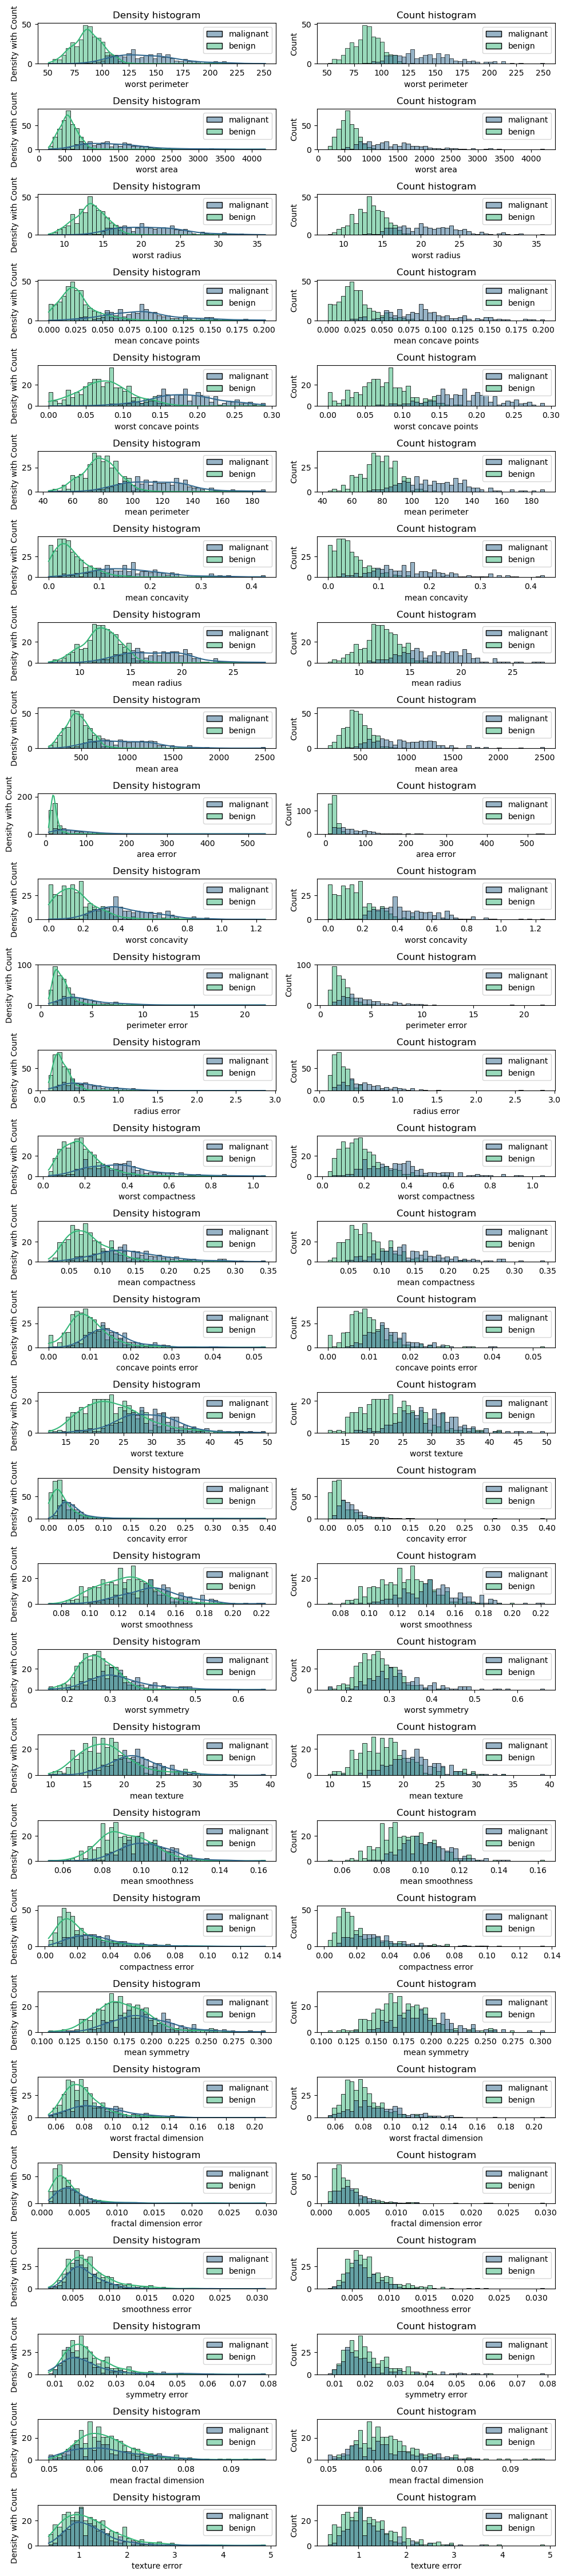

In [16]:
# Select the top-ranked feature based on mutual information for the first 6 features
top_feature_mi0 = mutual_info.index[0]
top_feature_mi1 = mutual_info.index[1]
top_feature_mi2 = mutual_info.index[2]
top_feature_mi3 = mutual_info.index[3]
top_feature_mi4 = mutual_info.index[4]
top_feature_mi5 = mutual_info.index[5]
top_feature_mi6 = mutual_info.index[6]
top_feature_mi7 = mutual_info.index[7]
top_feature_mi8 = mutual_info.index[8]
top_feature_mi9 = mutual_info.index[9]

# Print the top-ranked feature based on mutual information
print(f'Top-ranked feature based on mutual informations: {top_feature_mi0 , top_feature_mi1 , top_feature_mi2 , top_feature_mi3 , top_feature_mi4 , top_feature_mi5 , top_feature_mi6 , top_feature_mi7 , top_feature_mi8 , top_feature_mi9}')

# Create a conditional histogram for the top-ranked feature based on mutual information
# Plot subpolot separate histograms for density and count
fig, axes = plt.subplots(30, 2, figsize=(10, 45))

# Plot density histogram for the top-ranked feature based on mutual information
for i in range(30):
    sns.histplot(data=X, x=mutual_info.index[i], hue=y, palette='viridis', kde=True, bins=50, ax=axes[i, 0])
    # Set title and labels for density histogram
    axes[i, 0].set_title('Density histogram')
    axes[i, 0].set_xlabel(mutual_info.index[i])
    axes[i, 0].set_ylabel('Density with Count')

    # Plot count histogram
    sns.histplot(data=X, x=mutual_info.index[i], hue=y, palette='viridis', kde=False, bins=50, ax=axes[i, 1])
    # Set title and labels for count histogram
    axes[i, 1].set_title('Count histogram')
    axes[i, 1].set_xlabel(mutual_info.index[i])
    axes[i, 1].set_ylabel('Count')

    # Layout the subplots
    plt.tight_layout()

# Show the plot
plt.show()

En general, los histogramas condicionales sugieren que las algunas características podrían ser útiles para discriminar entre masas benignas y malignas:

Worst perimeter: Las distribuciones están claramente separadas, con un solapamiento mínimo entre masas benignas y malignas. Esto sugiere una fuerte relación entre el "worst perimeter" y la variable target, y probablemente una elevada información mutua.

Worst radius: Las distribuciones están claramente separadas, con un solapamiento mínimo entre masas benignas y malignas. Esto sugiere una fuerte relación entre el "worst radius" y la variable target, y probablemente una elevada información mutua.

Worst area: Las distribuciones están claramente separadas, con un solapamiento mínimo entre masas benignas y malignas. Esto sugiere una fuerte relación entre el "worst area" y la variable target, y probablemente una elevada información mutua.

Worst concave points: Las distribuciones están claramente separadas, con un solapamiento mínimo entre masas benignas y malignas. Esto sugiere una fuerte relación entre el "worst concave points" y la variable target, y probablemente una elevada información mutua.

Mean concave points: Las distribuciones están claramente separadas, con un solapamiento mínimo entre masas benignas y malignas. Esto sugiere una fuerte relación entre el "mean concave points" y la variable target, y probablemente una elevada información mutua.

Mean perimeter, Mean radius, Mean area, Mean concavity, Area error, Worst concavity también tienen relación con la variable target y alta información mutua.

Características con menor potencial para discriminar:

Hay cierto solapamiento entre las distribuciones del Perimeter error, Radius error, Mean compactness, Worst compactness, Concave points error, Worst texture, son algo diferentes,  pero parece que las masas malignas tienen valores más altos. Esto sugiere una relación moderada y una información mutua potencialmente moderada.

Existe un solapamiento significativo entre las distribuciones de las características Concavity error, Mean texture,  Worst smoothness, Worst symmetry, Compactness error, Mean smoothness, Mean symmetry, Worst fractal dimension, Fractal dimension error, Symmetry error, Smoothness error, Mean fractal dimension, Texture error para masas benignas y malignas. La relación entre las características y la variable target es probablemente débil, y el información mutua también sería bajo. Así que las características no parecen ser una característica útil para la discriminación.

#### ¿El orden en estos rankings te parece razonable? ¿las variables más informativas son las que tienen histogramas condicionados a la clase más separados? ¿Coinciden los dos rankings? ¿por qué?

Con base en la información analizada, podemos concluir que la clasificación realizada mediante correlación e información mutua presenta resultados razonables.

En general, se observa que las características que mayormente determinan la malignidad de las masas son el tamaño del perímetro, el radio, el área y la concavidad. En menor medida, la compacidad, la textura y los errores en el perímetro, el radio, el área o la concavidad también pueden ayudar a determinar si las masas son malignas o benignas, pero no son suficientes por sí solos.

Por otro lado, la suavidad, la simetría, la dimensión fractal y los errores en la compacidad, la textura y la simetría no parecen ser de gran utilidad para la predicción.

En este sentido, podemos afirmar que los valores más informativos son las que tienen los histogramas condicionados a la clase más separados.

Si bien los valores no son idénticos en las diferentes clasificaciones, podemos suponer una proporcionalidad directa entre ellos. Es decir, a medida que aumenta la correlación entre la variable target y las características, también se observa un aumento en la información mutua.

---

# Pregunta

### 3. Realiza un análisis PCA del dataset:
#### - Preprocesado de las variables X
#### - Cálculo de las nuevas variables PCA
#### - Scatter plot interactivo del dataset en las dos primeras componentes principales, donde cada punto tiene un color correspondiente a la clase, y en el que al pasar con el ratón encima de un punto se muestre el valor de las variables originales. ¿Qué puedes decir del dataset? ¿es un problema fácil de predecir?
#### - Scatter plot en el que se visualice el dataset junto a las proyecciones de las variables originales (una variable original, una flecha). ¿Qué puedes decir de las variables? ¿hay grupos diferenciados de variables? ¿los resultados son compatibles con los resultados de un clustermap de las variables?

Primero comprobemos si faltan valores y si hay valores atípicos:

In [17]:
# Check the misisng values for the features and the target variable
missing_values = X.isnull().sum()
missing_values_target = y.isnull().sum()
print("Missing values for the features: \n")
print(missing_values)
print()
print("Missing values for the target variable: \n")
print(missing_values_target)

Missing values for the features: 

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Missing values for the target variable: 

0


No tenemos valores perdidos.

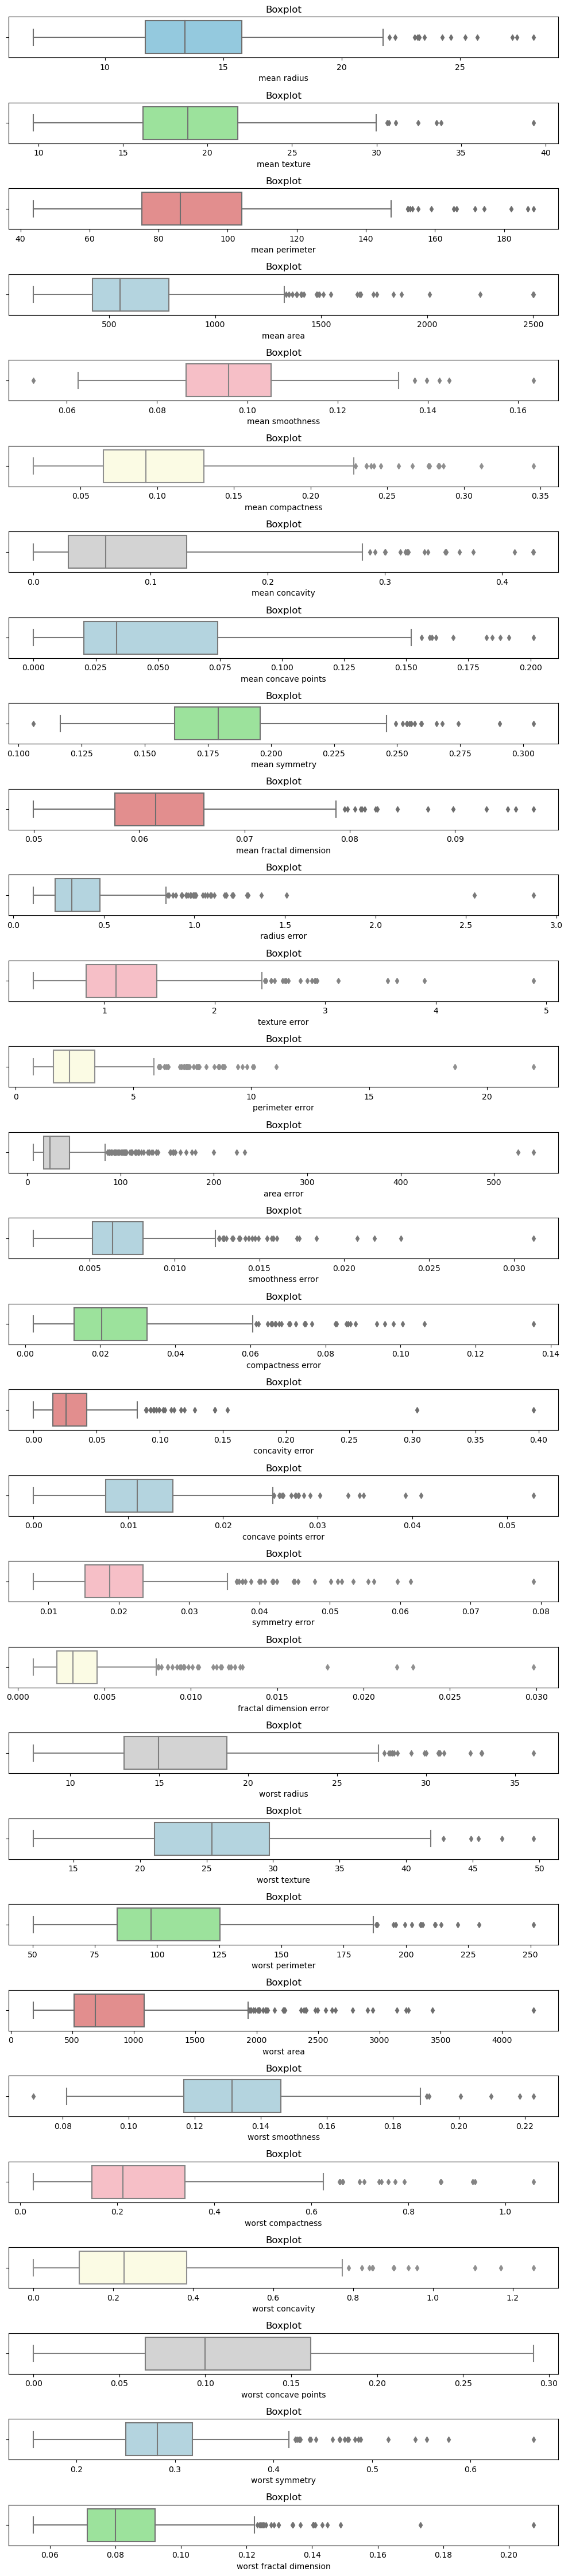

In [18]:
# Check the outliers for the features
# Create a boxplot for each feature
fig, axes = plt.subplots(30, 1, figsize=(10, 45))

# Plot a boxplot for each feature with distinct color
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightblue', 'lightpink', 'lightyellow', 'lightgrey', 'lightblue', 'lightgreen', 'lightcoral', 'lightblue', 'lightpink', 'lightyellow', 'lightgrey', 'lightblue', 'lightgreen', 'lightcoral', 'lightblue', 'lightpink', 'lightyellow', 'lightgrey', 'lightblue', 'lightgreen', 'lightcoral', 'lightblue', 'lightpink', 'lightyellow', 'lightgrey', 'lightblue', 'lightgreen']
for i in range(30):
    sns.boxplot(x=X.iloc[:, i], ax=axes[i], color=colors[i])
    # Set title and labels for the boxplot
    axes[i].set_title('Boxplot')
    axes[i].set_xlabel(X.columns[i])

    # Layout the subplots
    plt.tight_layout()

plt.show()

In [19]:
# Apply pre-processing to the data
pca = PCA()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)

# Calculate the variables of the PCA
print("Principal components: \n", pca.components_)
print()
print("Explained variance: \n", pca.explained_variance_)
print()
print("Explained variance ratio: \n", pca.explained_variance_ratio_)
print()
print("Singular values: \n", pca.singular_values_)

Principal components: 
 [[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672983e-02 -1.99878428e-01 -2.19351858e-01
   1.72304352e-01  1.43593173e-01  9.79641143e-02 -8.25723507e-03
   1.41883349e-01

In [20]:
# See the statistics of the data projected on the principal components as a DataFrame
# Create a DataFrame with the values of the PCA
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
print("Data projected on the principal components: \n")
print(X_pca_df.head())
print('Statistics of the data projected on the principal components: \n')
X_pca_df.describe().T

Data projected on the principal components: 

        PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0  9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424  2.159370   
1  2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013358   
2  5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668166   
3  7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053422  1.429911   
4  3.935302  -1.948072  1.389767  2.940639  0.546747 -1.226495 -0.936213   

        PC8       PC9      PC10  ...      PC21      PC22      PC23      PC24  \
0 -0.398407 -0.157118 -0.877402  ...  0.096515  0.068850  0.084519 -0.175256   
1  0.240988 -0.711905  1.106995  ... -0.077327 -0.094578 -0.217718  0.011290   
2  0.097374  0.024066  0.454275  ...  0.311067 -0.060309 -0.074291  0.102762   
3  1.059565 -1.405440 -1.116975  ...  0.434193 -0.203266 -0.124105  0.153430   
4  0.636376 -0.263805  0.377704  ... -0.116545 -0.017650  0.139454 -0.005332   

       PC25     

,count,mean,std,min,25%,50%,75%,max
PC1,569.0,1.545337e-16,3.647601,-5.565736,-2.757430,-1.173831,2.508766,16.319233
PC2,569.0,-2.048742e-17,2.387755,-7.775853,-1.499825,-0.195956,1.228297,12.573194
PC3,569.0,3.121893e-17,1.680152,-4.880361,-1.017071,-0.155702,0.856827,10.112424
PC4,569.0,1.038029e-16,1.408591,-5.133988,-0.786312,0.115566,0.969416,5.194270
PC5,569.0,-5.199902e-17,1.285159,-4.789656,-0.616092,-0.028984,0.610841,7.490434
PC6,569.0,-9.365678e-18,1.099765,-4.217768,-0.728062,-0.072414,0.616990,5.134228
PC7,569.0,-1.131686e-17,0.822441,-4.084684,-0.447891,-0.018178,0.454037,5.417219
PC8,569.0,2.107277e-17,0.690982,-3.953163,-0.372932,0.013631,0.349773,4.362306
PC9,569.0,3.346279e-17,0.646242,-2.969339,-0.323709,0.012545,0.362541,3.784119
PC10,569.0,5.838915e-17,0.592715,-2.738158,-0.366117,0.002340,0.326276,3.192639


In [21]:
for i in range(X_pca.shape[1]):
    print("* Projection in Principal Component #", i+1, ":")
    print(" - Mean:", X_pca[:,i].mean().round(3))
    print(" - Variance:", X_pca[:,i].var(ddof=1).round(3))
    print(" - Eigenvalue:", pca.explained_variance_[i].round(3))
    print(" - Explained variance:", (100*pca.explained_variance_ratio_[i]).round(3), "%")
    print()

* Projection in Principal Component # 1 :
 - Mean: 0.0
 - Variance: 13.305
 - Eigenvalue: 13.305
 - Explained variance: 44.272 %

* Projection in Principal Component # 2 :
 - Mean: -0.0
 - Variance: 5.701
 - Eigenvalue: 5.701
 - Explained variance: 18.971 %

* Projection in Principal Component # 3 :
 - Mean: 0.0
 - Variance: 2.823
 - Eigenvalue: 2.823
 - Explained variance: 9.393 %

* Projection in Principal Component # 4 :
 - Mean: 0.0
 - Variance: 1.984
 - Eigenvalue: 1.984
 - Explained variance: 6.602 %

* Projection in Principal Component # 5 :
 - Mean: 0.0
 - Variance: 1.652
 - Eigenvalue: 1.652
 - Explained variance: 5.496 %

* Projection in Principal Component # 6 :
 - Mean: -0.0
 - Variance: 1.209
 - Eigenvalue: 1.209
 - Explained variance: 4.025 %

* Projection in Principal Component # 7 :
 - Mean: -0.0
 - Variance: 0.676
 - Eigenvalue: 0.676
 - Explained variance: 2.251 %

* Projection in Principal Component # 8 :
 - Mean: 0.0
 - Variance: 0.477
 - Eigenvalue: 0.477
 - Explai

**Importamos la librería de plotly**

In [22]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

In [23]:
# Convert to array y variable
y_numerical1 = y_numerical.values
y_numerical1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [24]:
pc_x = 0
pc_y = 1

X_plot = pd.DataFrame({
    "Principal Component 1":X_pca[:,pc_x],
    "Principal Component 2":X_pca[:,pc_y],
    "Class": ["1-Benign" if w==1 else "0-Malignant" for w in y_numerical1],
    'WorstRadius':X["worst radius"],
    'WorstPerimeter':X["worst perimeter"],
    'WorstArea':X["worst area"],
    'MeanConcavity':X["mean concavity"],
    'MeanConcavePoints':X["mean concave points"],
    'MeanSymmetry':X["mean symmetry"],
    'MeanFractalDimension':X["mean fractal dimension"],
    'SmoothnessError':X["smoothness error"],
    'CompactnessError':X["compactness error"],
    'ConcavityError':X["concavity error"],
    'SymmetryError':X["symmetry error"],
    'FractalDimensionError':X["fractal dimension error"],
    'WorstTexture':X["worst texture"],
    'WorstSmoothness':X["worst smoothness"],
    'WorstCompactness':X["worst compactness"],
    'WorstConcavity':X["worst concavity"],
    'WorstConcavePoints':X["worst concave points"],
    'WorstSymmetry':X["worst symmetry"],
    'WorstFractalDimension':X["worst fractal dimension"],
    'TextureError':X["texture error"],
    'RadiusError':X["radius error"],
    'PerimeterError':X["perimeter error"],
    'AreaError':X["area error"],
    'MeanTexture':X["mean texture"],
    'MeanRadius':X["mean radius"],
    'MeanPerimeter':X["mean perimeter"],
    'MeanArea':X["mean area"],
    'MeanSmoothness':X["mean smoothness"],
    'MeanCompactness':X["mean compactness"],
    'WorstRadius':X["worst radius"],    
    'index':X.index,
})

# Adjust the 'size' parameter in the px.scatter function
fig = px.scatter(X_plot.sort_values("Class"), x="Principal Component 1", y="Principal Component 2", size_max=2, opacity=1, color="Class", hover_name="Class", hover_data=list(X_plot.columns))

# Set the size of the figure
fig.layout.width = 1500  # Set the width of the figure
fig.layout.height = 700  # Set the height of the figure

fig.update_traces(marker=dict(line=dict(width=0)))
py.iplot(fig)



#### - Scatter plot interactivo del dataset en las dos primeras componentes principales, donde cada punto tiene un color correspondiente a la clase, y en el que al pasar con el ratón encima de un punto se muestre el valor de las variables originales. ¿Qué puedes decir del dataset? ¿es un problema fácil de predecir?

Se puede afirmar que la predicción de la malignidad de las masas es un problema relativamente sencillo. Esto se debe a que existe una correlación directa entre los valores originales de ciertas características, como los perímetros, los radios, los áreaa de la masa y el tamaño de los puntos cóncavos, y los valores de los componentes principales 1 y 2. A medida que aumentan los valores originales, también aumentan los valores de los componentes principales, lo que a su vez incrementa la probabilidad de que la masa sea maligna.

---

In [25]:
# Plot Scatter plot of the first two principal components
ClassNames = y.unique()
opac = 1
colors = y_numerical
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ['diamond', 'circle']
# Plot Scatter plot for X_pca projected on the first two principal components
data = []
for label,color,marker in zip(ClassNames,colors,markers):
    inds = np.where(y == label)[0]
    data.append(go.Scatter(x=X_pca[inds,0], y=X_pca[inds,1], mode='markers', marker=dict(size=5, color=color, symbol=marker, opacity=opac), name=label))

layout = go.Layout(title='PCA', xaxis=dict(title='Principal Component 1'), yaxis=dict(title='Principal Component 2'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

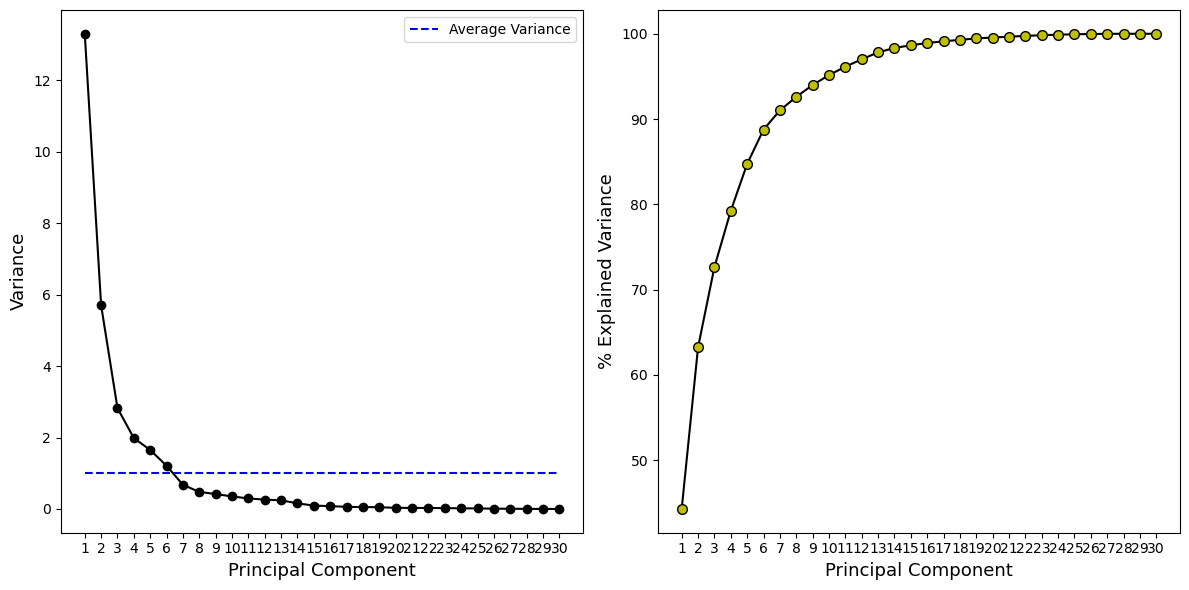

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(1,pca.n_components_+1), pca.explained_variance_, '-ok')
plt.plot([1,pca.n_components_], [1,1], '--b', label='Average Variance')
plt.legend()
plt.xlabel('Principal Component', fontsize=13)
plt.ylabel('Variance', fontsize=13)
plt.xticks(range(1,pca.n_components_+1))

plt.subplot(1,2,2)
plt.plot(range(1,pca.n_components_+1), 100*pca.explained_variance_ratio_.cumsum(), '-ok', label='Cumulative Explained Variance', markerfacecolor='y', markersize=7)
plt.xlabel('Principal Component', fontsize=13)
plt.ylabel('% Explained Variance', fontsize=13)
plt.xticks(range(1,pca.n_components_+1))

plt.tight_layout()
plt.show()


En el gráfico segundo, podemos ver que Un conjunto de datos con 30 variables sobre las características de un paciente se puede reducir a 6 componentes principales que expliquen el 90% de la variabilidad original.

Así, si fijamos n_componentes=6, guardamos aproximadamente el 90% de variabilidad de los datos originales (sólo perderemos el 10% de los datos).

También si fijamos n_componentes=10, guardamos aproximadamente el 95% de variabilidad de los datos originales (sólo perderemos el 15% de los datos)

Por lo que podemos reducir considerablemente las dimensiones originales.

---

<Figure size 2000x1500 with 0 Axes>

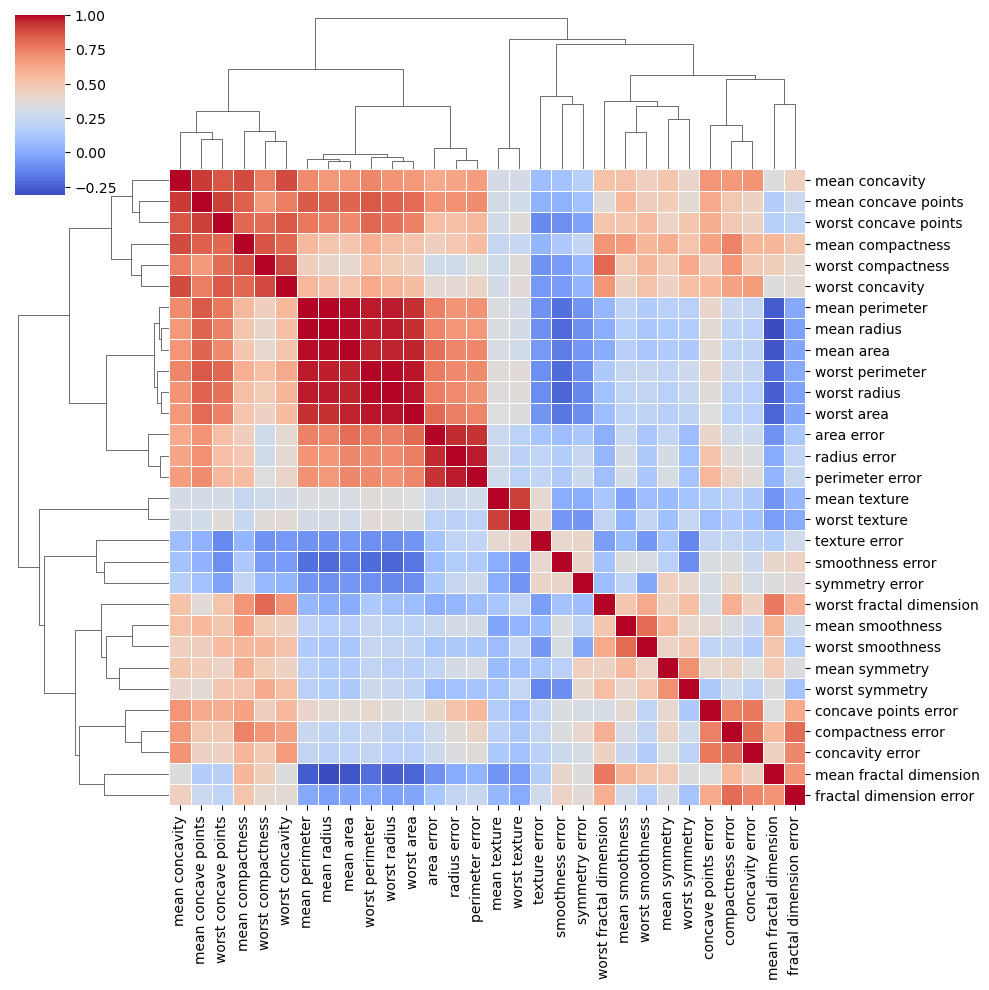

In [27]:
# Plot a cluster map to visualize the correlation between the features
plt.figure(figsize=(20, 15))
plt.tight_layout()
sns.clustermap(X.corr(), annot=False, cmap='coolwarm', linewidths=0.4, fmt=".2f")
plt.show()

In [28]:
ColumnList = list(X.columns)
ClassNames = y.unique()
# We calculated before
# X_scaled = scaler.fit_transform(X)
# X_pca = pca.transform(X_scaled)
pcs_names = ["Principal Component 1", "Principal Component 2"]

def PCA_plot(X, y, ColumnList, ClassNames,
             colors, pca, pcs_names,
             ax, pc_x=0, pc_y=1, escala_flechas=2, alpha=0.6):
    for label,color in zip(ClassNames,colors):
        inds = np.where(y == label)[0]
        plt.scatter(X_pca[inds, pc_x],
                    X_pca[inds, pc_y],
                    s = 60,
                    c = color,
                    alpha = alpha,
                    cmap='RdYlGn',
                    label = label)
    factor = escala_flechas*6*np.sqrt(np.max(np.cov(X_scaled,rowvar=False)))
    aux = np.eye(len(ColumnList))
    attributes_PCA = pca.transform(aux)
    for a,name in zip(attributes_PCA,ColumnList):
        ax.arrow(0, 0, a[pc_x]*factor, a[pc_y]*factor,
                 head_width=1/4*0.05*factor*1.5/escala_flechas,
                 head_length=1/4*0.1*factor*1.5/escala_flechas,
                 fc='k', ec='k')
        plt.text(a[pc_x]*factor, a[pc_y]*factor, name, color='r')
        
    plt.legend(); plt.grid(); plt.tight_layout()
    plt.xlabel(pcs_names[pc_x], fontsize=12)
    plt.ylabel(pcs_names[pc_y], fontsize=12)

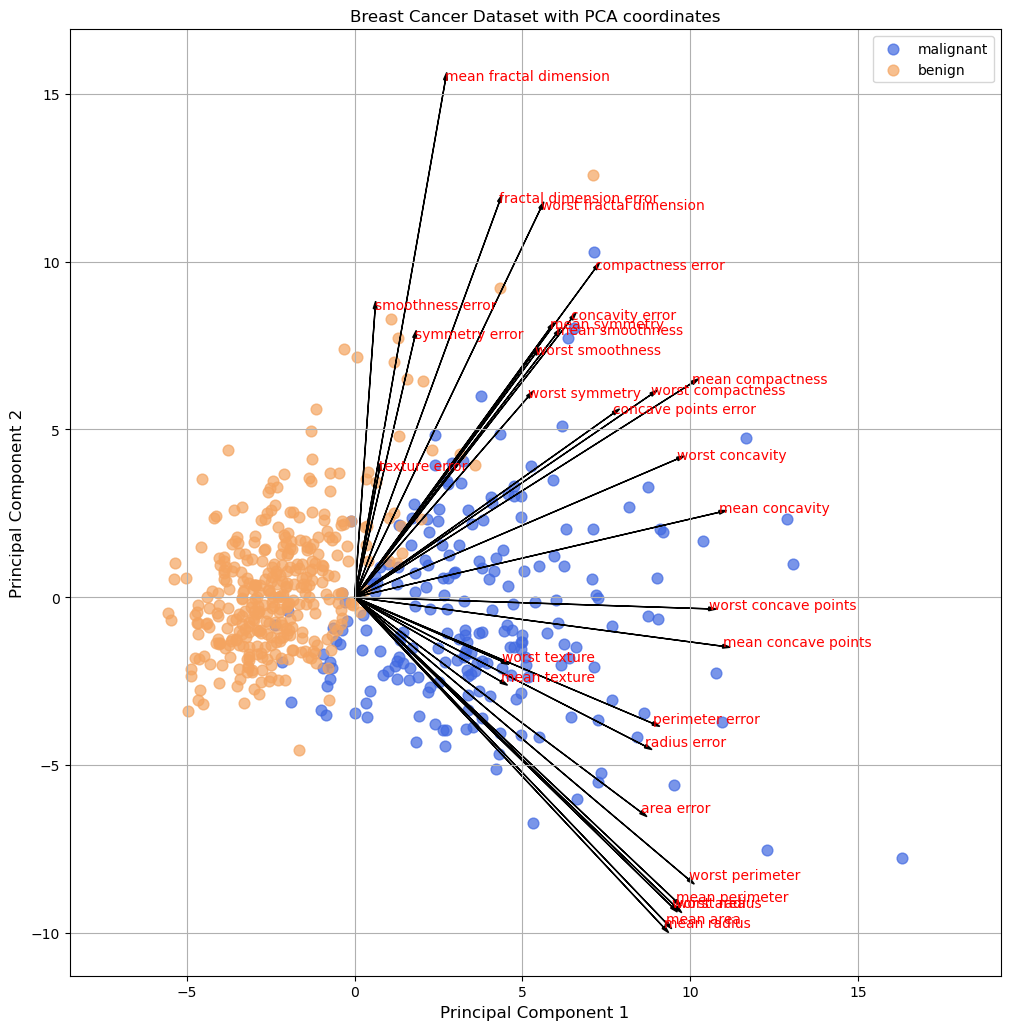

In [29]:
colors = ["royalblue", "sandybrown"]

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(1,1,1)
PCA_plot(X, y, ColumnList, ClassNames, colors, pca, pcs_names, ax, pc_x=0, pc_y=1, escala_flechas=7, alpha=0.7)
plt.title('Breast Cancer Dataset with PCA coordinates')
plt.axis('equal')
plt.show()

#### - Scatter plot en el que se visualice el dataset junto a las proyecciones de las variables originales (una variable original, una flecha). ¿Qué puedes decir de las variables? ¿hay grupos diferenciados de variables? ¿los resultados son compatibles con los resultados de un clustermap de las variables?


Worst perimeter, Worst radius, Worst area, Worst concave points, Mean concave points, Mean perimeter, Mean radius, Mean area, Mean concavity, Area error, Worst concavity, Perimeter error, Radius error, Mean compactness y Worst compactness están altamente correlacionados. Al mismo tiempo, se observa una correlación moderada entre Mean fractal dimension,Fractal dimension error, Compactness error,Concavity error y Concave points error en el gráfico de clustermap.

Cuando observamos este gráfico de flechas, podemos notar que estas características están agrupadas en la misma región. 

Worst perimeter, Worst radius, Worst area, Worst concave points, Mean concave points, Mean perimeter, Mean radius, Mean area, Mean concavity, Area error, Worst concavity, Perimeter error, Radius error, Mean compactness y Worst compactness están en el mismo grupo. 

Mean fractal dimension,Fractal dimension error, Compactness error,Concavity error, Concave points error están en el mismo grupo. 

Además, observamos que las características no correlacionadas están ubicadas en regiones separadas.

Por un lado, a medida que aumentan los valores de Worst perimeter, Worst radius, Worst area, Worst concave points, Mean concave points, Mean perimeter, Mean radius, Mean area y Mean concavity, se incrementa la probabilidad de que la masa sea maligna.

Por otro lado, la baja utilidad predictiva de la suavidad, la simetría, la dimensión fractal y los errores en la compacidad, la textura y la simetría no afecta la capacidad de predecir si una masa es maligna o benigna.

---